<a href="http://www.road2quant.com">
    <img src="https://uploads-ssl.webflow.com/5eae007d92687089219c5dec/5eb47da29ced78042e9768ce_long_logo.png" target="_blank" align="right" border="0" width="35%" >
</a>

# Jump Difussion Model

In [12]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [13]:
plt.style.use('seaborn')
plt.rcParams['font.family'] = 'serif'
%matplotlib inline

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [14]:
def characteristic_function(u, T, r, sigma, lamb, mu, delta):
    omega = r - 0.5 * sigma ** 2 - lamb * (np.exp(mu + 0.5 * delta ** 2) - 1)
    value = np.exp((1j * u * omega - 0.5 * u ** 2 * sigma ** 2 +
            lamb * (np.exp(1j * u * mu - u ** 2 * delta ** 2 * 0.5) - 1))  * T)
    return value

In [15]:
def integration_function(u, S0, K, T, r, sigma, lamb, mu, delta):
    JDCF = characteristic_function(u - 0.5 * 1j, T, r,
                                       sigma, lamb, mu, delta)
    value = 1 / (u ** 2 + 0.25) * (np.exp(1j * u * math.log(S0 / K))
                                    * JDCF).real
    return value

In [16]:
def value_call_INT(S0, K, T, r, sigma, lamb, mu, delta):
    int_value = quad(lambda u: integration_function(u, S0, K, T, r,
                    sigma, lamb, mu, delta), 0, 50, limit=250)[0]
    call_value = S0 - np.exp(-r * T) * math.sqrt(S0 * K) / math.pi * int_value
    return call_value

In [17]:
S0 = 100.0  # initial index level
K = 100.0  # strike level
T = 1.0  # call option maturity
r = 0.05  # constant short rate
sigma = 0.4  # constant volatility of diffusion
lamb = 1.0  # jump frequency p.a.
mu = -0.2  # expected jump size
delta = 0.1  # jump size volatility

In [18]:
print ('Value of Call Option %8.3f' \
            % value_call_INT(S0, K, T, r, sigma, lamb, mu, delta))

Value of Call Option   19.948


In [22]:
def generate_paths(S0, T, r, sigma, lamb, mu, delta, M, I):
    dt = T / M
    rj = lamb * (math.exp(mu + 0.5 * delta ** 2) - 1)
    shape = (M + 1, I)
    S = np.zeros((M + 1, I), dtype=np.float)
    S[0] = S0

    np.random.seed(100)
    rand1 = np.random.standard_normal(shape)
    rand2 = np.random.standard_normal(shape)
    rand3 = np.random.poisson(lamb * dt, shape)

    for t in range(1, M + 1, 1):
        S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt
                           + sigma * math.sqrt(dt) * rand1[t])
                           + (np.exp(mu + delta * rand2[t]) - 1)
                           * rand3[t])
    return S

In [23]:
M = 100  # time steps
I = 10  # paths
S = generate_paths(S0, T, r, sigma, lamb, mu, delta, M, I)

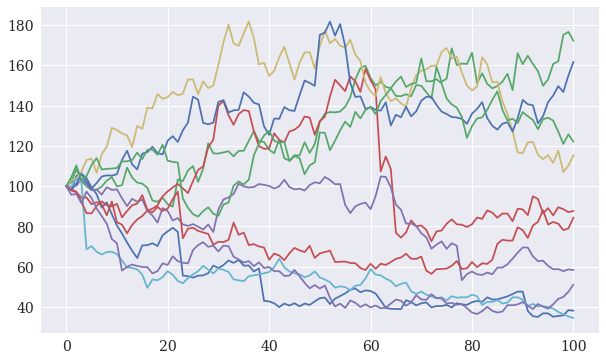

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(S);